<a href="https://colab.research.google.com/github/anuva05/PracticalDeepLearningCourse/blob/master/Lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
!rm data/goats/*
!rm data/cats/*

In this lesson, we download images from Google, create a dataset with certain labeled classes and  train a classifer to distinguish between them!
In short, we do this by search for the required images in Google Images, opening the Java console in our browser and running the following code. This creates a .csv file of all the URLs of the images we found (the last one will be the last one visible on the page we scrolled on).

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

For our examples, let's choose goats to be one class, and cats to be another. Now, we create folders on our servers and store these .csv files.

In [10]:
folder = 'goats'
file = 'goats.csv'
path = Path('data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
folder = 'cats'
file = 'cats.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
path.ls()

[PosixPath('data/.ipynb_checkpoints'),
 PosixPath('data/cats'),
 PosixPath('data/goats')]

Let us now download some images

In [0]:
classes = ['goats','cats']
folder = 'goats'
file = 'goats.csv'
path = Path('data/goats')
dest = path
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'cats'
file = 'cats.csv'
path = Path('data/cats')
dest = path
download_images(path/file, dest, max_pics=200)

Remove images that cannot be opened.

In [13]:
path = Path('data')
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

goats


cats


View the data.

(['cats', 'goats'], 2, 256, 64)

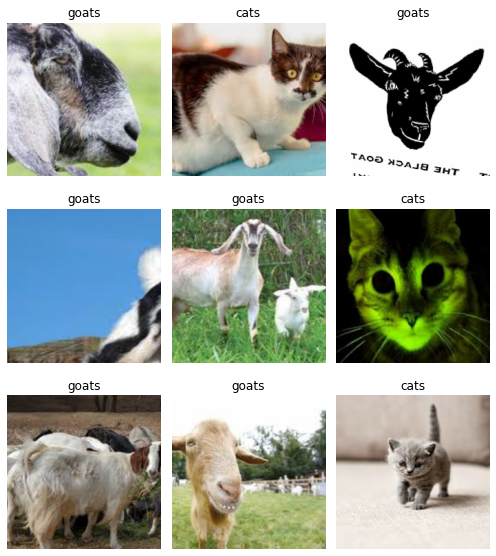

In [14]:
np.random.seed(42)
path=Path('data')
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
#prints classes
data.classes
#shows images
data.show_batch(rows=3, figsize=(7,8))
#prints additional info
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

Training the model.


In [15]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [16]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.408543,0.084484,0.046875,00:05
1,0.199184,0.108309,0.031250,00:03
2,0.138015,0.140808,0.015625,00:03
3,0.132562,0.177632,0.015625,00:03
4,0.106139,0.202367,0.031250,00:03


After 5 epochs, our error rate is 3.1%.

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

Now, lets take a look at the learning rate.  The learning rate is rate at which we update the parameters. If we plot the loss vs. learning rate, and discover that the loss is increasing (this is bad) after a particular learning rate, we should adjust the learning rate to a lower value/range of values so that we get better results.



In [0]:
learn.lr_find()

In [0]:
# If the plot is not showing try to give a start and end learning rate
learn.lr_find(start_lr=1e-5, end_lr=1e-1)

In [0]:
learn.recorder.plot()

Let's try to fit a model again, this time after specifying a range of learning rates to be used.

In [24]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.018604,1.059910,0.125000,00:04
1,0.016370,0.996426,0.140625,00:04


In [0]:
learn.save('stage-2')

This model is worse..the error rate is too high. Let us stick to the previous model.

# Interpretation

In [0]:
learn.load('stage-1');

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

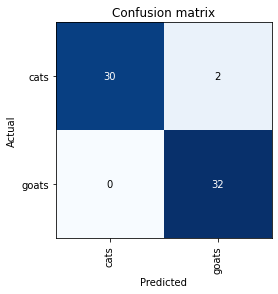

In [32]:
interp.plot_confusion_matrix()

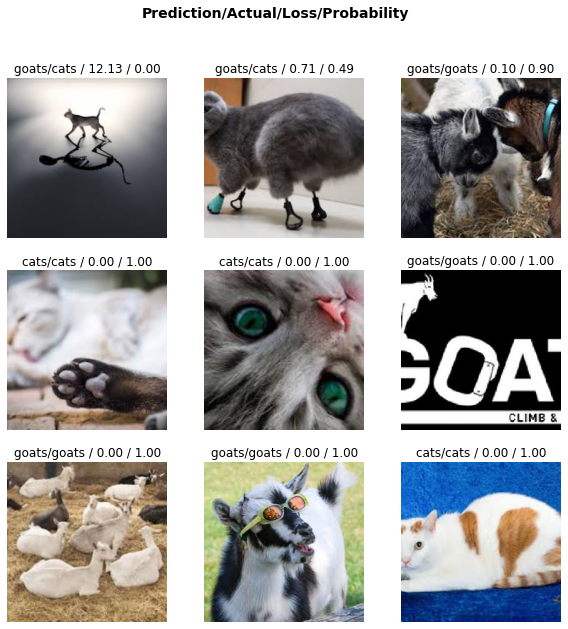

In [33]:
interp.plot_top_losses(9, figsize=(10,10)) 

It can be seen that the two most confusing images are in the far left, top corner in the above matrix. They are, indeed, confusing to classify. For the remaining images, our classifer did quite well!